# Spool holder for filament spool

## Variables

In [1]:
coneH=30;     //height of the cone
coneDin=25;   //smallest diameter of the cone
coneDout=70;  //widest diameter of cone
axleD=8;      //axle diameter of the axle for the 608 bearing - we;ll add for printer tolerance
$fn=100;      //make things round
bearingH=7;   //608 skateboard bearing height
bearingD=22;  //608 skateboard bearing diameter we'll add amillimeter or two later to account for the fitting ring
nubAngle=45;  //the fitting nubs for the bearing at x degree rotation
printerRadTol=.85; //add this value to the radius
nubRad=.5;    //the nub radius for the bearing fitting ring


Number of lines of OpenSCAD code: 11


## The Cone primitive

Compiling design (CSG Products normalization)...
Normalized CSG tree has 1 elements


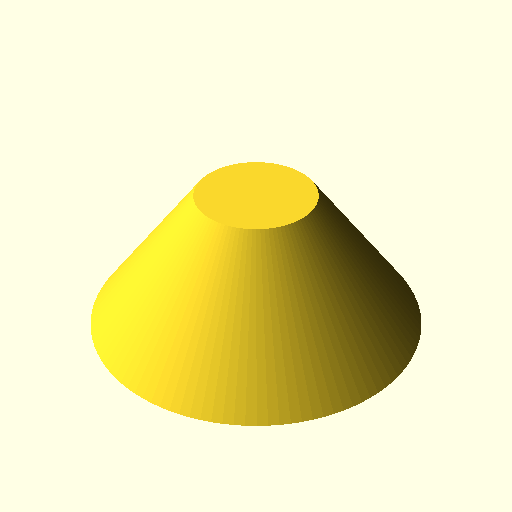

In [2]:

module cone() {
    cylinder(h=coneH , r2=(coneDin/2) , r1=(coneDout/2) );
    }
%display cone();

## 608 Skateboard bearing and 8mm axle for subtraction
The axle ends slightly above and below the cone so that it can be subtracted fuully leaving no cone face display artifacts.
The bearing is also trasposed slightly below the cone so as to allow it's full subtraction.

Compiling design (CSG Products normalization)...
Normalized CSG tree has 2 elements


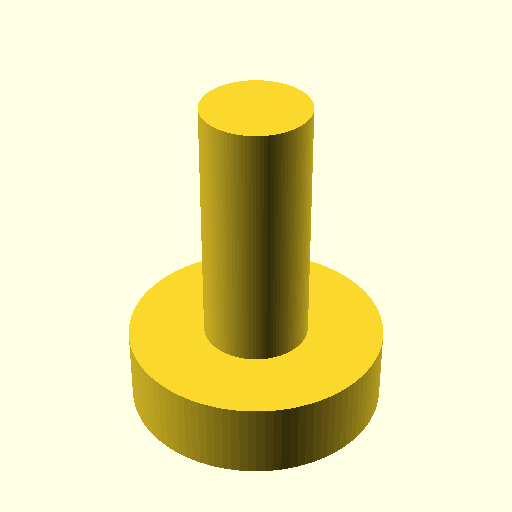

In [3]:

module bearingEtc() {
    translate([0,0,-.1]) cylinder(h=bearingH+.1,r=(bearingD/2)+printerRadTol); //bearing
    translate([0,0,-.1]) cylinder(h=coneH+.2,r=(axleD/2)+printerRadTol); //axle
    }
%display bearingEtc();


Compiling design (CSG Products normalization)...
Normalized CSG tree has 2 elements
Compiling highlights (1 CSG Trees)...


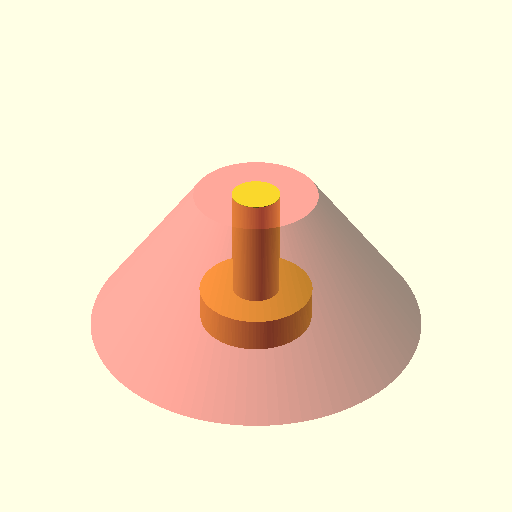

In [4]:
%%display
difference(){
    #cone();
    bearingEtc();
}
bearingEtc();

## Subracting material for quicker printing

In [5]:

//subtract for quicker print
module removeCyls(){
    translate([-((bearingD/2)+(coneDout/4)+4),0,-.1]) cylinder(h=coneH,r=coneDout/4);
    translate([+((bearingD/2)+(coneDout/4)+4),0,-.1]) cylinder(h=coneH,r=coneDout/4);
    translate([0,+((bearingD/2)+(coneDout/4)+4),-.1]) cylinder(h=coneH,r=coneDout/4);
    translate([0,-((bearingD/2)+(coneDout/4)+4),-.1]) cylinder(h=coneH,r=coneDout/4);
    }



Number of lines of OpenSCAD code: 29


Compiling design (CSG Products normalization)...
Normalized CSG tree has 2 elements
Compiling highlights (1 CSG Trees)...


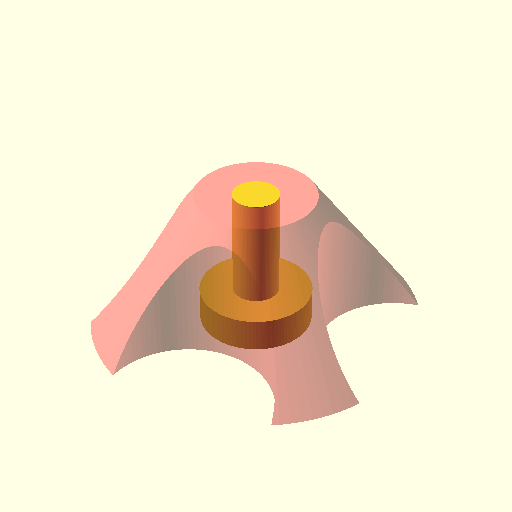

In [6]:
%%display
difference(){
    #cone();
    removeCyls();
    }
bearingEtc();

## A skateboard bearing fitting ring

Compiling design (CSG Products normalization)...
Normalized CSG tree has 2 elements


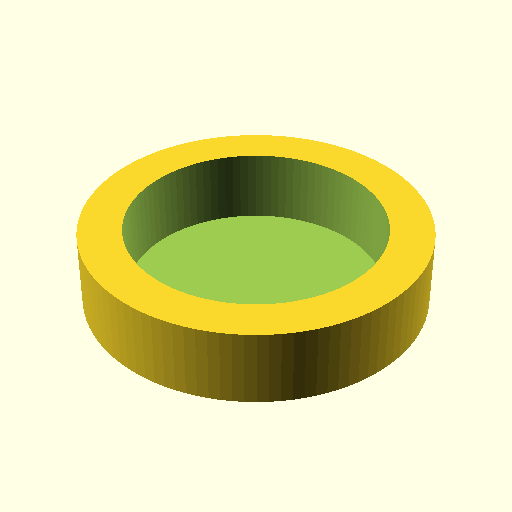

In [7]:
module ring(inRad,outRad,height,tol) {
  difference(){
      cylinder(h=height,r=outRad+tol);
      translate([0,0,.1]) cylinder(h=height+.2,r=inRad+tol);
    }  
}
%display ring(11,15,7,printerRadTol);

ECHO: 0
ECHO: 45
ECHO: 90
ECHO: 135
ECHO: 180
ECHO: 225
ECHO: 270
ECHO: 315
ECHO: 360
Compiling design (CSG Products normalization)...
Normalized CSG tree has 11 elements


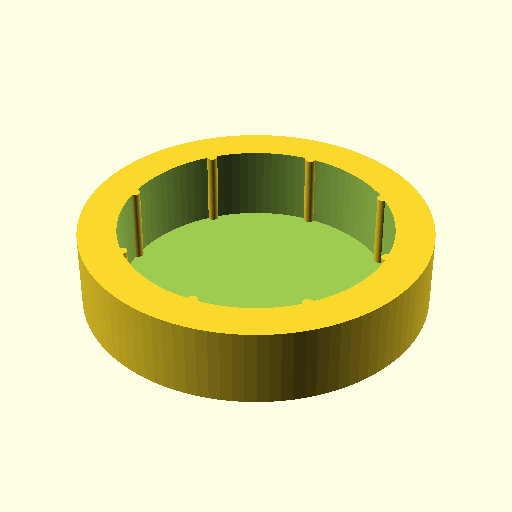

In [8]:

module fittingNubsCircle(nubRad,height,inRad,angle,tol) {
    rad=inRad+nubRad+tol;
    for (pos=[0:angle:360]) {
        echo(pos);
        rotate ([0,0,pos]) translate([rad,0,0]) cylinder(h=height,r=nubRad);
    }
}


In [ ]:
%%display 
fittingNubsCircle(nubRad,bearingH,bearingD/2,nubAngle,printerRadTol); 
ring(11+nubRad,15,7,printerRadTol);


In [13]:
%saveAs fitting.stl
fittingNubsCircle(nubRad,bearingH,bearingD/2,nubAngle,printerRadTol); 
ring(11+nubRad,15,7,printerRadTol);

File 'fitting.stl' created

In [10]:
%displayCode

coneH=30;     //height of the cone
coneDin=25;   //smallest diameter of the cone
coneDout=70;  //widest diameter of cone
axleD=8;      //axle diameter of the axle for the 608 bearing - we;ll add for printer tolerance
$fn=100;      //make things round
bearingH=7;   //608 skateboard bearing height
bearingD=22;  //608 skateboard bearing diameter we'll add amillimeter or two later to account for the fitting ring
nubAngle=45;  //the fitting nubs for the bearing at x degree rotation
printerRadTol=.85; //add this value to the radius
nubRad=.5;    //the nub radius for the bearing fitting ring

module cone() {
    cylinder(h=coneH , r2=(coneDin/2) , r1=(coneDout/2) );
    }

module bearingEtc() {
    translate([0,0,-.1]) cylinder(h=bearingH+.1,r=(bearingD/2)+printerRadTol); //bearing
    translate([0,0,-.1]) cylinder(h=coneH+.2,r=(axleD/2)+printerRadTol); //axle
    }

//subtract for quicker print
module removeCyls(){
    translate([-((bearingD/2)+(coneDout/4)+4),0,-.1]) cylinder(h=coneH,r=cone